In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
cd C:\Users\soumy\Downloads

C:\Users\soumy\Downloads


In [5]:
df1=pd.read_csv("Bang_House_Price.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.shape

(13320, 9)

In [7]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

## Dropping redundant features

In [11]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df3 = df2.dropna()

In [15]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [16]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\soumy\AppData\Local\Temp\ipykernel_6420\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


## Explore the total_sqft column

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


## Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take
## average of min and max value in the range. There are other cases such as 34.46Sq. Meter
## which one can convert to square ft using unit conversion. I am going to just drop such corner
## cases to keep things simple.

In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    elif len(tokens)==1 and tokens[0].isnumeric()==True:
        return float(tokens[0])
    else:
        return None

In [22]:
convert_sqft_to_num("6-8")

7.0

In [23]:
convert_sqft_to_num("6")

6.0

In [24]:
convert_sqft_to_num("50.46sqft")

In [25]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


## Add new feature called price per square feet

In [26]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.311300e+04
mean     7.920831e+03
std      1.070802e+05
min      2.678298e+02
25%      4.262295e+03
50%      5.423729e+03
75%      7.301587e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

## Examine locations which is a categorical variable. We need to apply dimensionality reduction.


In [28]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                                  533
Sarjapur  Road                              391
Electronic City                             304
Kanakpura Road                              259
Thanisandra                                 234
                                           ... 
Maruthi HBCS Layout                           1
K R C kothanur                                1
1Channasandra                                 1
Ramaswamy Palya - Kammanahalli Main Road      1
Abshot Layout                                 1
Name: count, Length: 1284, dtype: int64

In [29]:
location_stats.values.sum()

13113

In [30]:
len(location_stats[location_stats>10])

239

In [31]:
len(location_stats)

1284

In [32]:
len(location_stats[location_stats<=10])

1045

## Any location having less than 10 data points should be tagged as "other" location. 
## This way number of categories can be reduced by huge amount. 
## Later on when we do one hot encoding, it will help us with having fewer dummy columns.

In [33]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Thyagaraja Nagar                            10
Nagappa Reddy Layout                        10
Gunjur Palya                                10
Sector 1 HSR Layout                         10
Nagadevanahalli                             10
                                            ..
Maruthi HBCS Layout                          1
K R C kothanur                               1
1Channasandra                                1
Ramaswamy Palya - Kammanahalli Main Road     1
Abshot Layout                                1
Name: count, Length: 1045, dtype: int64

In [34]:
len(df5.location.unique())

1284

In [35]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

len(df5.location.unique())

240

In [36]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Usually sqft/bhk=300, so keeping that as a threshold we weed out the outliers.

In [37]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


## Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and
## total sqft is 600. These are clear data errors that can be removed safely.

In [38]:
df5.shape

(13113, 7)

In [39]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12369, 7)

In [40]:
df6.price_per_sqft.describe()

count     12369.000000
mean       6297.239048
std        4167.973782
min         267.829813
25%        4205.175601
50%        5285.714286
75%        6899.923018
max      176470.588235
Name: price_per_sqft, dtype: float64

## Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a
## wide variation in property prices. We should remove outliers per location using mean and one
## standard deviation.

In [43]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10177, 7)

## Let's visialize how does the 2 BHK and 3 BHK property prices look like.

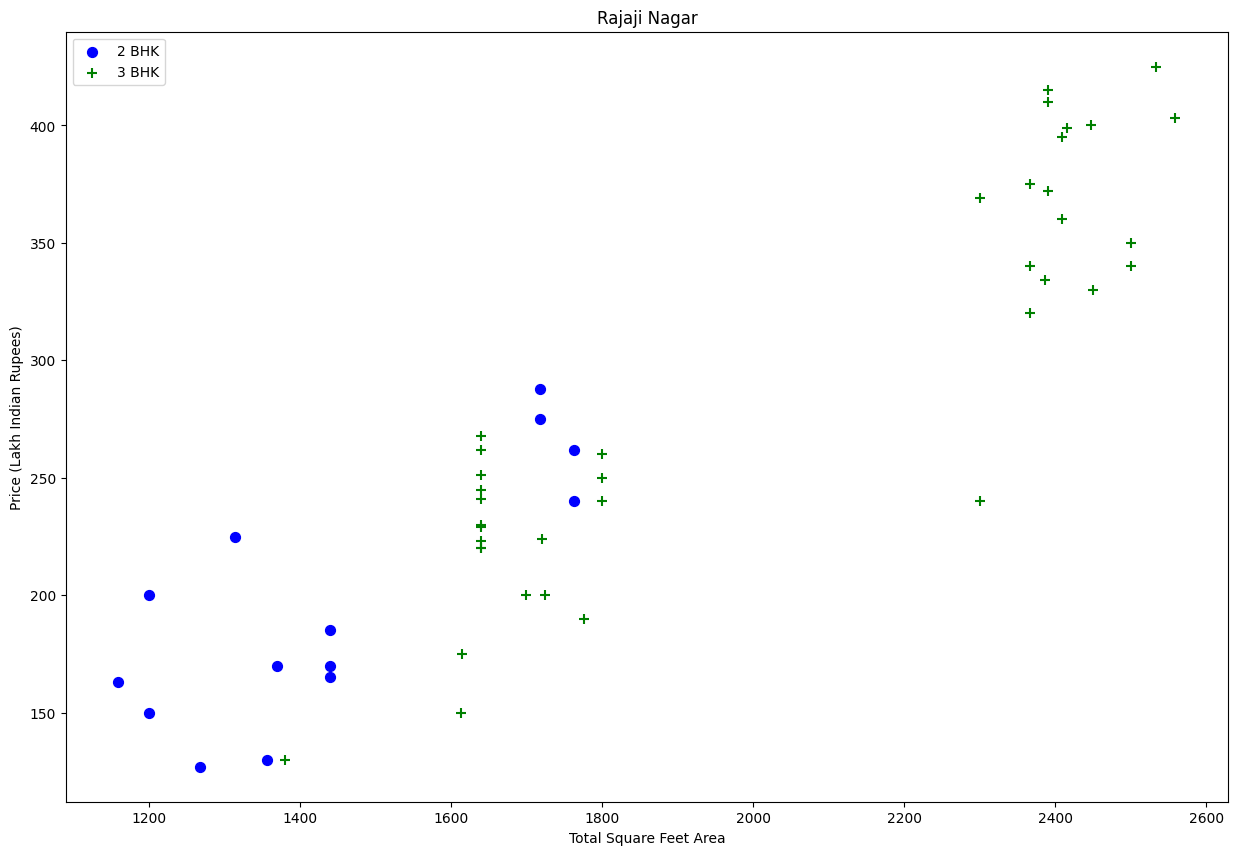

In [48]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7,"Rajaji Nagar")

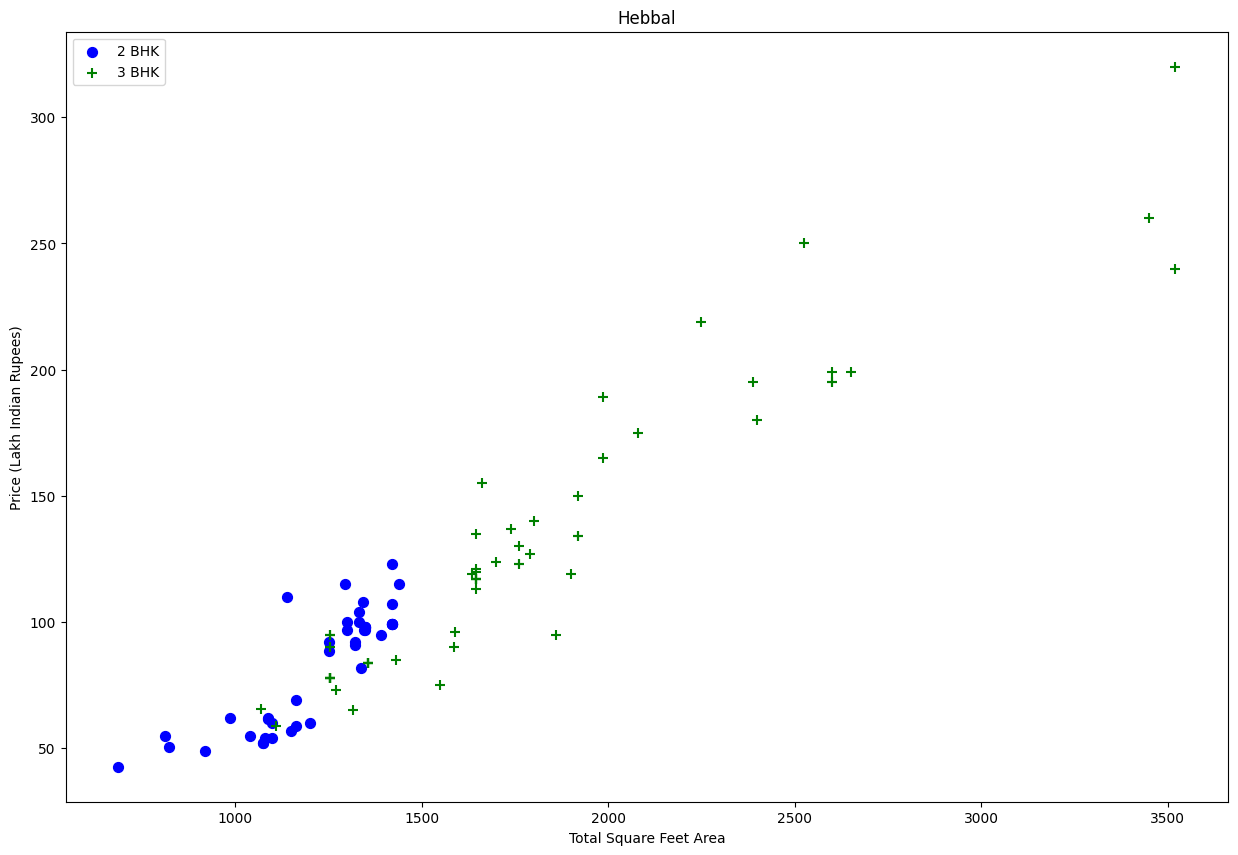

In [49]:
plot_scatter_chart(df7,"Hebbal")

## We should also remove properties where for same location, the price of (for example) 3
## bedroom apartment is less than 2 bedroom apartment (with same square ft area).

In [52]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
            'mean': np.mean(bhk_df.price_per_sqft),
            'std': np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
}
    for bhk, bhk_df in location_df.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
            exclude_indices = np.append(exclude_indices,
bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [53]:
df8 = remove_bhk_outliers(df7)

In [54]:
df8.shape

(9011, 7)

## Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

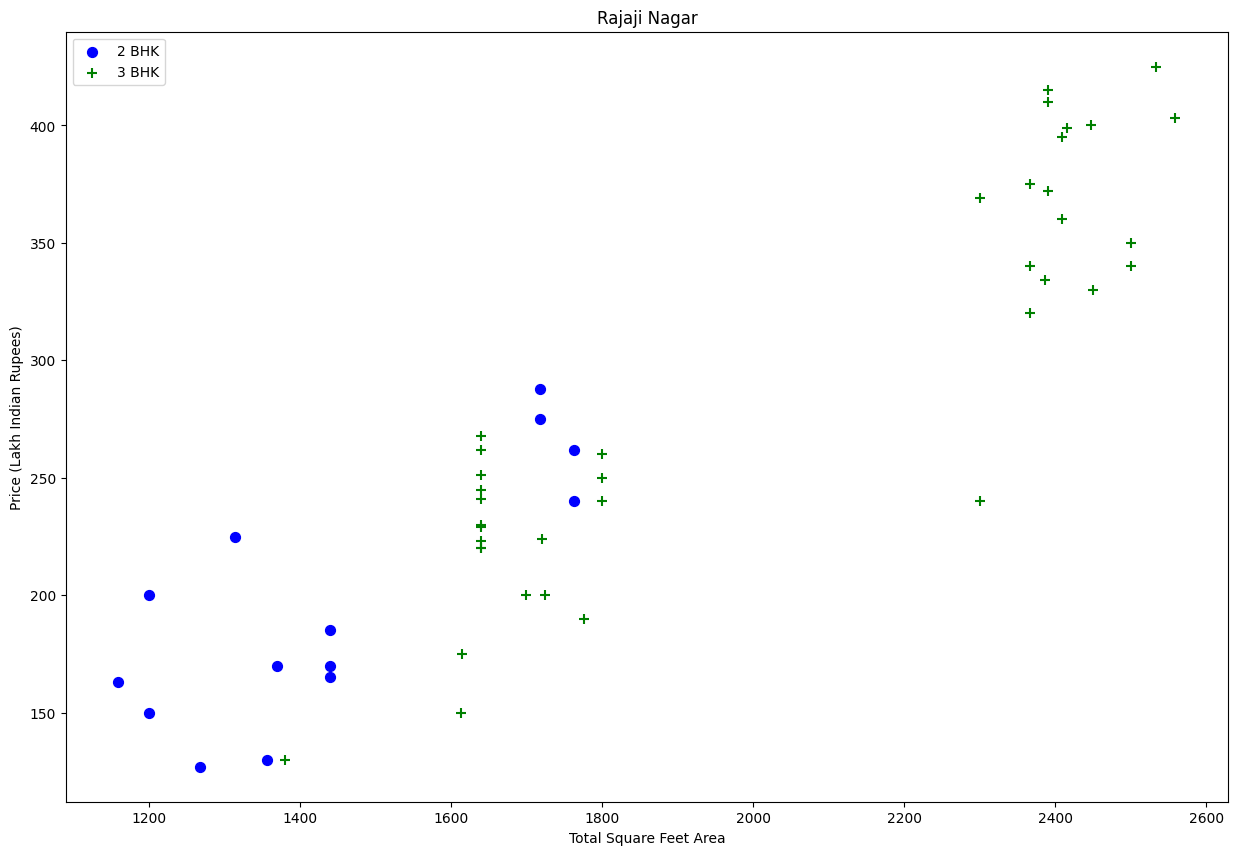

In [55]:
plot_scatter_chart(df8,"Rajaji Nagar")

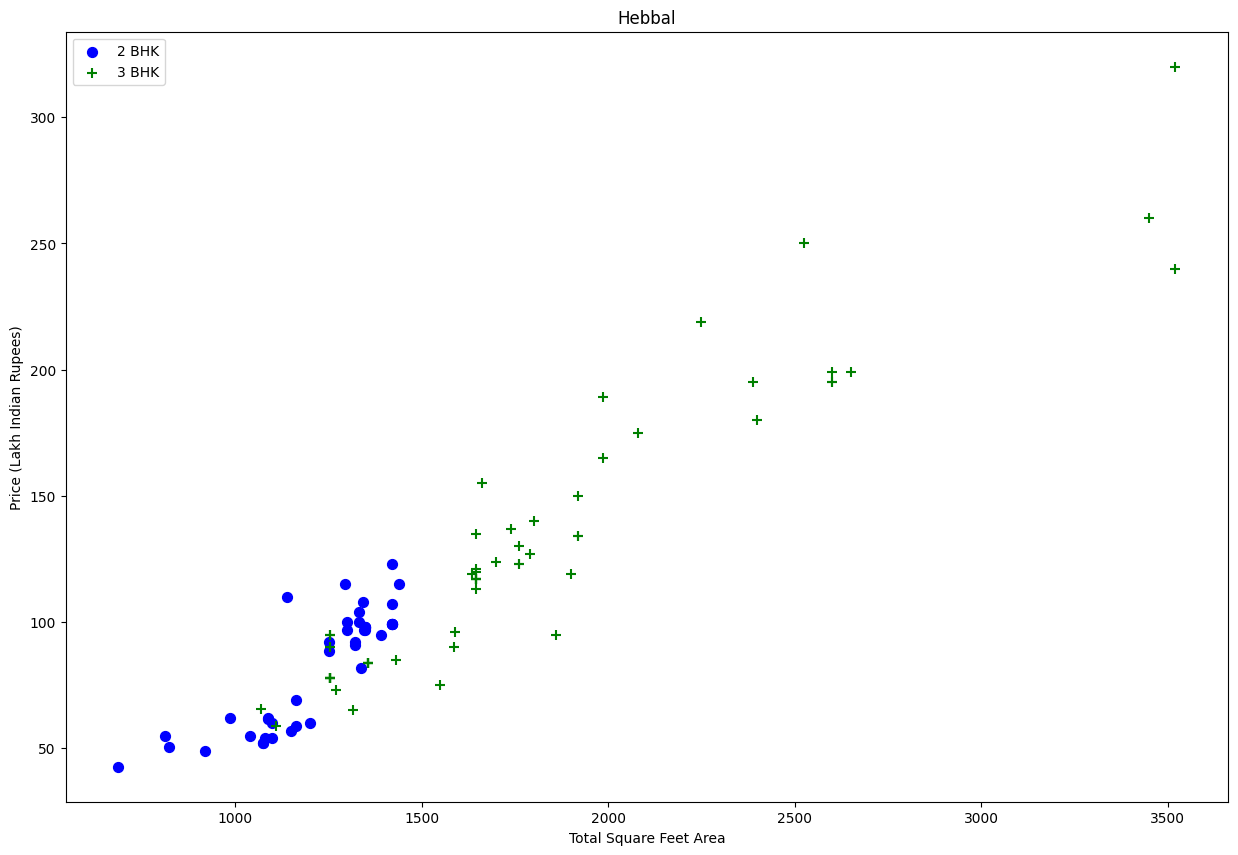

In [56]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

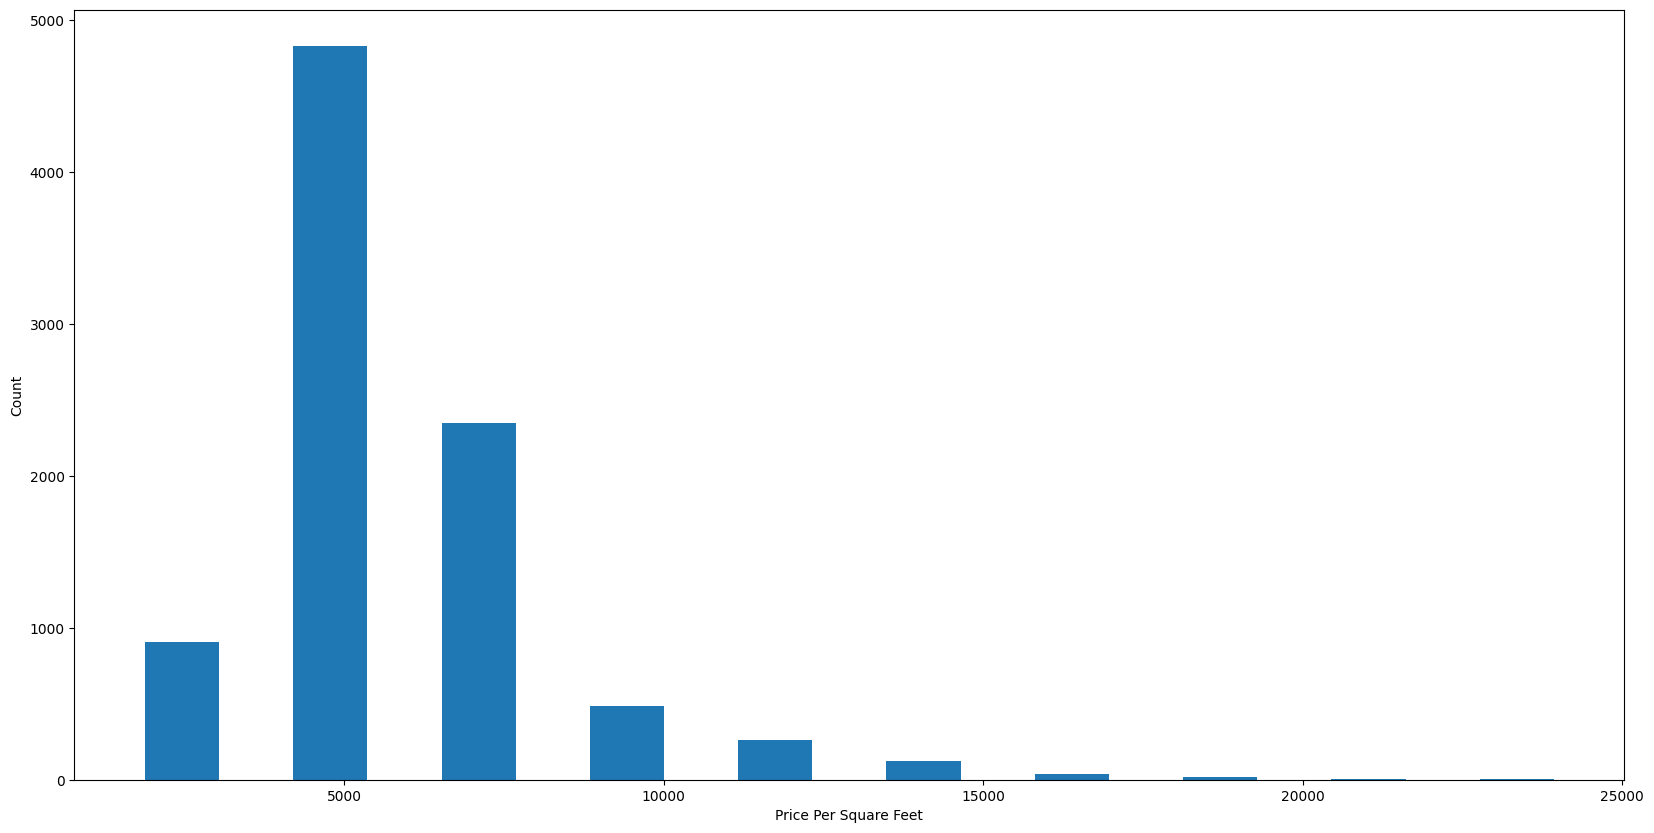

In [61]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.5)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

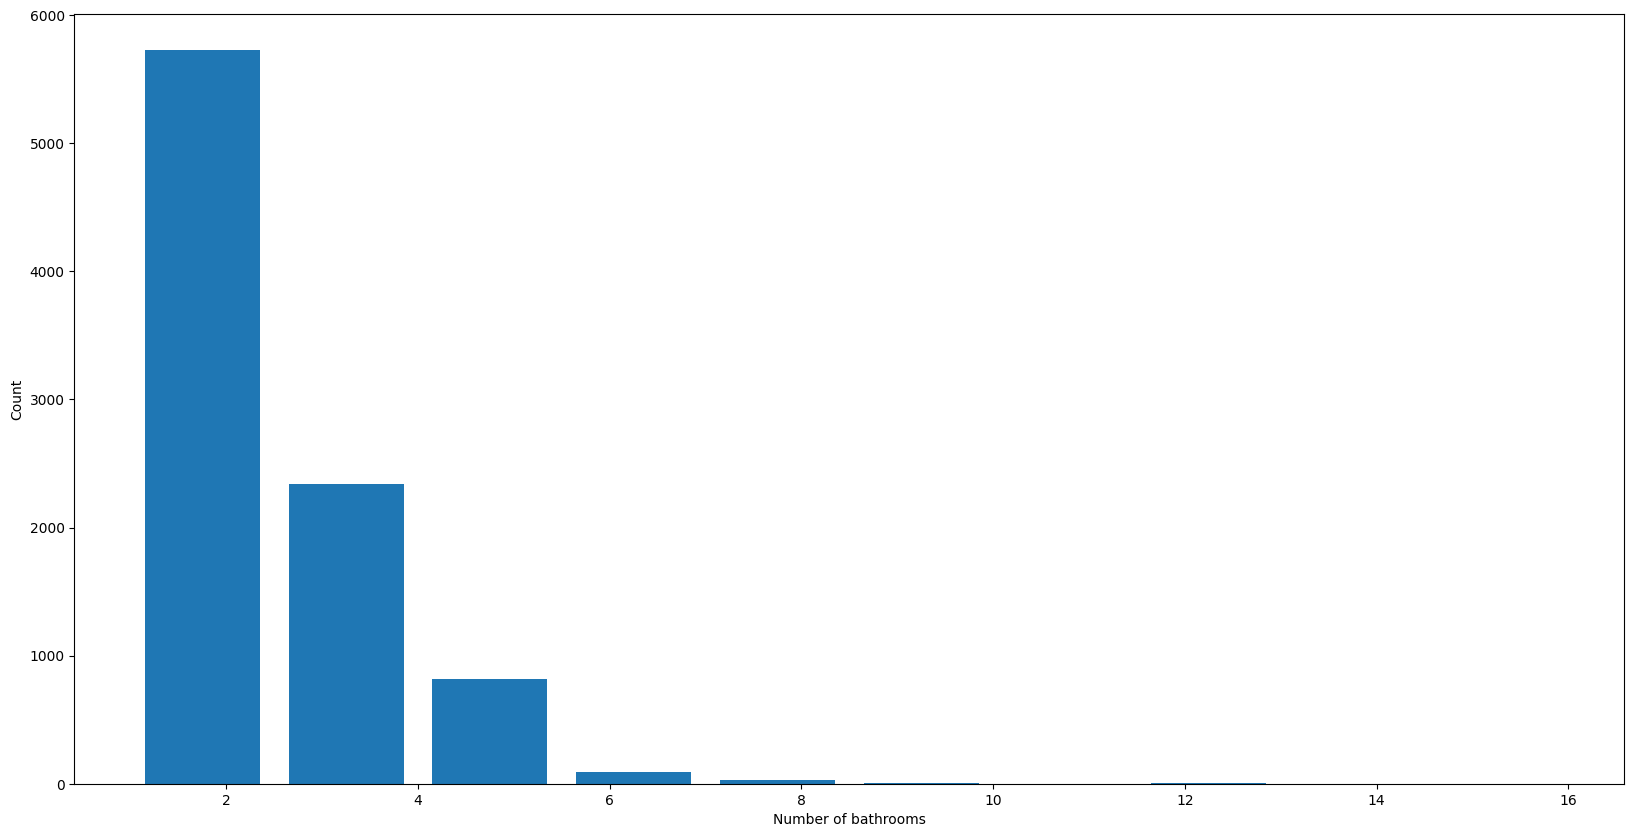

In [65]:


plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [66]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5227,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8420,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8510,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9242,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9573,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


## It is unusual to have 2 more bathrooms than number of bedrooms in a home.
## We again chop out such outliers.

In [67]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(8922, 7)

## Dropping features which aren't needed anymore.

In [68]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [69]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

## Splitting the data into training and testing slots.

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

## Now it's time to make a model.

In [89]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7844729870363817

## We use K-fold cross validation to iterate the model k times over various folds of data.

In [90]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77567752, 0.84084932, 0.80289447, 0.7799235 , 0.88136519])

In [91]:
sum(cross_val_score(LinearRegression(), X, y, cv=cv))/5

0.81614200145006

## We are getting an average score of about 81.6%, which is kind of okayish. So we accept this model.

In [92]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [93]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\soumy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.01631376467218

In [94]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\soumy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.35842187703972

In [95]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\soumy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


185.31417988615146

In [96]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)
import json
columns = {
'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))